In [2]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

from qs_mps.sparse_hamiltonians_and_operators import *
from qs_mps.mps_class import MPS

In [98]:
L = 8
H_xzx = sparse_cluster_hamiltonian(J=1,h_t=0,L=L, eps=1e-7)

In [99]:
e, v = diagonalization(H_xzx, sparse=False)
print(e)

[-6.00000020e+00 -6.00000000e+00 -6.00000000e+00 -5.99999980e+00
 -4.00000020e+00 -4.00000020e+00 -4.00000020e+00 -4.00000020e+00
 -4.00000020e+00 -4.00000020e+00 -4.00000000e+00 -4.00000000e+00
 -4.00000000e+00 -4.00000000e+00 -4.00000000e+00 -4.00000000e+00
 -4.00000000e+00 -4.00000000e+00 -4.00000000e+00 -4.00000000e+00
 -4.00000000e+00 -4.00000000e+00 -3.99999980e+00 -3.99999980e+00
 -3.99999980e+00 -3.99999980e+00 -3.99999980e+00 -3.99999980e+00
 -2.00000020e+00 -2.00000020e+00 -2.00000020e+00 -2.00000020e+00
 -2.00000020e+00 -2.00000020e+00 -2.00000020e+00 -2.00000020e+00
 -2.00000020e+00 -2.00000020e+00 -2.00000020e+00 -2.00000020e+00
 -2.00000020e+00 -2.00000020e+00 -2.00000020e+00 -2.00000000e+00
 -2.00000000e+00 -2.00000000e+00 -2.00000000e+00 -2.00000000e+00
 -2.00000000e+00 -2.00000000e+00 -2.00000000e+00 -2.00000000e+00
 -2.00000000e+00 -2.00000000e+00 -2.00000000e+00 -2.00000000e+00
 -2.00000000e+00 -2.00000000e+00 -2.00000000e+00 -2.00000000e+00
 -2.00000000e+00 -2.00000

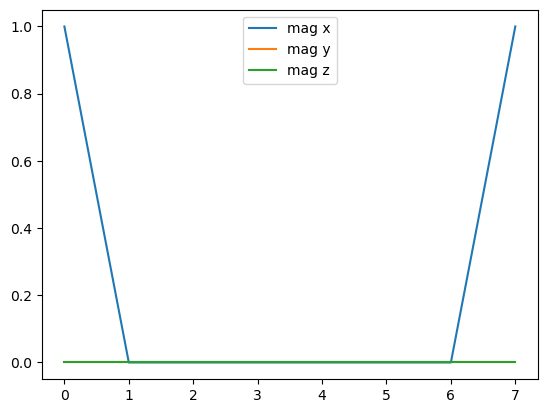

In [100]:
psi = v[:,0]
mag_x = []
mag_y = []
mag_z = []
for i in range(L):
    mag = (psi.conjugate() @ (sparse_pauli_x(n=i, L=L)) @ psi).real
    mag_x.append(mag)
    mag = (psi.conjugate() @ (sparse_pauli_y(n=i, L=L)) @ psi).real
    mag_y.append(mag)
    mag = (psi.conjugate() @ (sparse_pauli_z(n=i, L=L)) @ psi).real
    mag_z.append(mag)
plt.plot(mag_x,label="mag x")
plt.plot(mag_y,label="mag y")
plt.plot(mag_z,label="mag z")
plt.legend()
plt.show()

In [101]:
psi

array([ 0.06250002+0.j,  0.06250002+0.j,  0.0625    +0.j,  0.0625    +0.j,
        0.06250001+0.j,  0.06250001+0.j, -0.06249999+0.j, -0.06249999+0.j,
        0.06250001+0.j,  0.06250001+0.j,  0.06250001+0.j,  0.06250001+0.j,
        0.0625    +0.j,  0.0625    +0.j, -0.06250001+0.j, -0.06250001+0.j,
        0.06250001+0.j,  0.06250001+0.j, -0.06249999+0.j, -0.06249999+0.j,
        0.06250001+0.j,  0.06250001+0.j,  0.06249999+0.j,  0.06249999+0.j,
       -0.06249999+0.j, -0.06249999+0.j,  0.0625    +0.j,  0.0625    +0.j,
       -0.0625    +0.j, -0.0625    +0.j, -0.06250001+0.j, -0.06250001+0.j,
        0.06250001+0.j,  0.06250001+0.j,  0.06250001+0.j,  0.06250001+0.j,
        0.06250001+0.j,  0.06250001+0.j, -0.0625    +0.j, -0.0625    +0.j,
        0.06250001+0.j,  0.06250001+0.j,  0.06250001+0.j,  0.06250001+0.j,
        0.06250001+0.j,  0.06250001+0.j, -0.0625    +0.j, -0.0625    +0.j,
        0.0625    +0.j,  0.0625    +0.j, -0.06249999+0.j, -0.06249999-0.j,
        0.06250001+0.j,  

## Add an external field

transverse field: -10.0
transverse field: -9.797979797979798
transverse field: -9.595959595959595
transverse field: -9.393939393939394
transverse field: -9.191919191919192
transverse field: -8.98989898989899
transverse field: -8.787878787878787
transverse field: -8.585858585858587
transverse field: -8.383838383838384
transverse field: -8.181818181818182
transverse field: -7.979797979797979
transverse field: -7.777777777777778
transverse field: -7.575757575757576
transverse field: -7.373737373737374
transverse field: -7.171717171717171
transverse field: -6.96969696969697
transverse field: -6.767676767676768
transverse field: -6.565656565656566
transverse field: -6.363636363636363
transverse field: -6.161616161616162
transverse field: -5.959595959595959
transverse field: -5.757575757575758
transverse field: -5.555555555555555
transverse field: -5.353535353535354
transverse field: -5.151515151515151
transverse field: -4.94949494949495
transverse field: -4.747474747474747
transverse field:

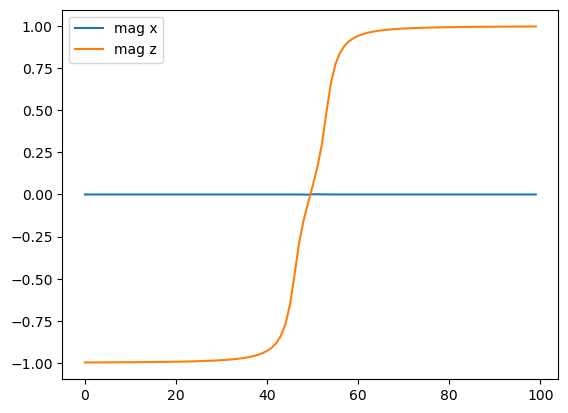

In [9]:
L = 12
mag_x = []
mag_z = []
for lamb in np.linspace(-10,10,100):
    print(f"transverse field: {lamb}")
    H = sparse_cluster_hamiltonian(J=1, h_t = lamb, L=L)
    e, v = diagonalization(H, sparse=True)
    psi = v[:,0]
    mag = (psi.conjugate() @ (sparse_pauli_x(n=L//2, L=L)) @ psi).real
    mag_x.append(mag)
    mag = (psi.conjugate() @ (sparse_pauli_z(n=L//2, L=L)) @ psi).real
    mag_z.append(mag)
plt.plot(mag_x,label="mag x")
plt.plot(mag_z,label="mag z")
plt.legend()
plt.show()


## Make it 2D

In [38]:
L = 15
mag_x = []
mag_z = []
rdms = []
grid_h = np.linspace(0, 2, 32).tolist()
grid_h.reverse()
grid_j = np.linspace(0, 2, 32)

v0 = np.zeros((2**L,1))
v0[0] = 1

for j in grid_j:
    mag_x_j = []
    mag_z_j = []
    rdm_j = []
    for h in grid_h:
        print(f"transverse field h: {h} for j: {j}")
        H = sparse_cluster_hamiltonian(J=j, h_t=h, L=L)
        e, v = diagonalization(H, sparse=True, v0=v0)
        psi = v[:,0]
        mag = (psi.conjugate() @ (sparse_pauli_x(n=L//2, L=L)) @ psi).real
        mag_x_j.append(mag)
        mag = (psi.conjugate() @ (sparse_pauli_z(n=L//2, L=L)) @ psi).real
        mag_z_j.append(mag)
        if h == grid_h[0]:
            v0_j = psi
        v0 = psi

        chain = MPS(L=L, d=2, model="Cluster", chi=128)
        chain.vector_to_mps(vec=psi, chi=128)
        rdm = chain.reduced_density_matrix([L//2])
        rdm_j.append(rdm)

    v0 = v0_j
    mag_x_j.reverse()
    mag_z_j.reverse()
    rdm_j.reverse()
    mag_x.append(mag_x_j)
    mag_z.append(mag_z_j)
    rdms.append(rdm_j)

transverse field h: 2.0 for j: 0.0
transverse field h: 1.935483870967742 for j: 0.0
transverse field h: 1.8709677419354838 for j: 0.0
transverse field h: 1.8064516129032258 for j: 0.0
transverse field h: 1.7419354838709677 for j: 0.0
transverse field h: 1.6774193548387095 for j: 0.0
transverse field h: 1.6129032258064515 for j: 0.0
transverse field h: 1.5483870967741935 for j: 0.0
transverse field h: 1.4838709677419355 for j: 0.0
transverse field h: 1.4193548387096775 for j: 0.0
transverse field h: 1.3548387096774193 for j: 0.0
transverse field h: 1.2903225806451613 for j: 0.0
transverse field h: 1.2258064516129032 for j: 0.0
transverse field h: 1.161290322580645 for j: 0.0
transverse field h: 1.096774193548387 for j: 0.0
transverse field h: 1.032258064516129 for j: 0.0
transverse field h: 0.967741935483871 for j: 0.0
transverse field h: 0.9032258064516129 for j: 0.0
transverse field h: 0.8387096774193548 for j: 0.0
transverse field h: 0.7741935483870968 for j: 0.0
transverse field h: 

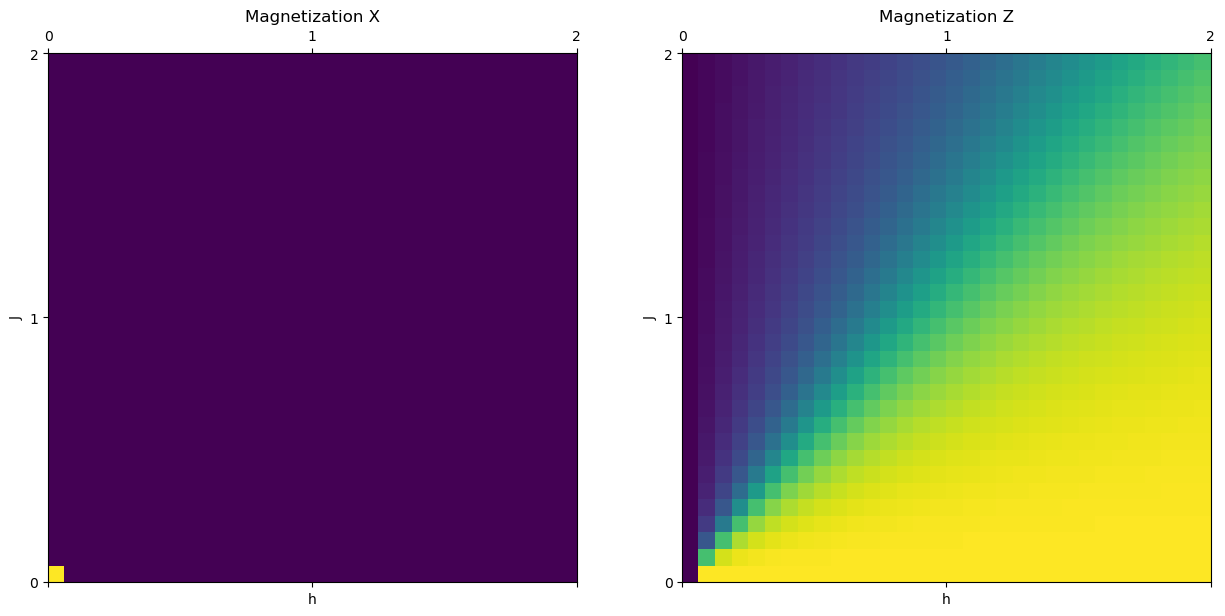

In [39]:
params = [[j,h] for j in grid_j for h in grid_j]
params_extent = np.concatenate([np.min(params, axis=0), np.max(params, axis=0)])
params_extent = tuple(params_extent[[0, 2, 1, 3]])

fig, ax = plt.subplots(1,2, figsize=(15,10))
ax[0].matshow(mag_x, origin='lower', extent=params_extent)
ax[0].set_title("Magnetization X")
ax[0].set_xlabel("h")
ax[0].set_ylabel("J")
ax[1].matshow(mag_z, origin='lower', extent=params_extent)
ax[1].set_title("Magnetization Z")
ax[1].set_xlabel("h")
ax[1].set_ylabel("J");

In [41]:
path_rdms = "/Users/fradm98/Desktop/fidelity-phase-tran"
np.save(f"{path_rdms}/results/data/X_1-rdms_cluster_L_{L}_h-j_0.0-2.0_delta_32_degeneracy_method_2_guess_path.npy", rdms)

## Cluster-$XY$ model

Ferro in $Y$

In [9]:
H = sparse_cluster_xy_hamiltonian(J=0, h_t=0, h_x=0, h_y=-1, L=6)
e, v = diagonalization(H, sparse=False)
psi = v[:,0]
print(e)
print(psi)
print((1/np.sqrt(2))**6)

[-5.00001 -4.99999 -3.00001 -3.00001 -3.00001 -3.00001 -3.00001 -2.99999
 -2.99999 -2.99999 -2.99999 -2.99999 -1.00001 -1.00001 -1.00001 -1.00001
 -1.00001 -1.00001 -1.00001 -1.00001 -1.00001 -1.00001 -0.99999 -0.99999
 -0.99999 -0.99999 -0.99999 -0.99999 -0.99999 -0.99999 -0.99999 -0.99999
  0.99999  0.99999  0.99999  0.99999  0.99999  0.99999  0.99999  0.99999
  0.99999  0.99999  1.00001  1.00001  1.00001  1.00001  1.00001  1.00001
  1.00001  1.00001  1.00001  1.00001  2.99999  2.99999  2.99999  2.99999
  2.99999  3.00001  3.00001  3.00001  3.00001  3.00001  4.99999  5.00001]
[ 1.25000000e-01+0.00000000e+00j  1.25000000e-01-1.83311720e-14j
  1.25000000e-06+1.25000000e-01j  1.25000002e-06+1.25000000e-01j
  1.25000000e-06+1.25000000e-01j  1.25000002e-06+1.25000000e-01j
 -1.25000000e-01+2.50000000e-06j -1.25000000e-01+2.50000002e-06j
  1.25000000e-06+1.25000000e-01j  1.25000002e-06+1.25000000e-01j
 -1.25000000e-01+2.50000000e-06j -1.25000000e-01+2.50000002e-06j
 -1.25000000e-01+2.500000

## $h_x=0$ case

In [48]:
# we can insert additional interaction terms in XX or YY or both
L=12
hys = np.linspace(-4,4,16)
hs = np.linspace(-2,4,16)

mag_x = []
mag_z = []
rdms = []
for hy in hys:
    mag_x_h = []
    mag_z_h = []
    rdms_h = []
    for h in hs:
        print(f"hy: {hy}, h: {h}")
        H = sparse_cluster_xy_hamiltonian(J=1, h_t=h, h_x=0, h_y=hy, L=L)
        e, v = diagonalization(H, sparse=True)
        psi = v[:,0]
        mag = (psi.conjugate() @ (sparse_pauli_x(n=L//2, L=L)) @ psi).real
        mag_x_h.append(mag)
        mag = (psi.conjugate() @ (sparse_pauli_z(n=L//2, L=L)) @ psi).real
        mag_z_h.append(mag)

        chain = MPS(L=L, d=2, model="Cluster", chi=32)
        chain.vector_to_mps(vec=psi, chi=32)
        rdm = chain.reduced_density_matrix([L//2-2,L//2-1,L//2,L//2+1,L//2+2])
        rdms_h.append(rdm)

    mag_x.append(mag_x_h)
    mag_z.append(mag_z_h)
    rdms.append(rdms_h)

hy: -4.0, h: -2.0
hy: -4.0, h: -1.6
hy: -4.0, h: -1.2
hy: -4.0, h: -0.7999999999999998
hy: -4.0, h: -0.3999999999999999
hy: -4.0, h: 0.0
hy: -4.0, h: 0.40000000000000036
hy: -4.0, h: 0.8000000000000003
hy: -4.0, h: 1.2000000000000002
hy: -4.0, h: 1.6
hy: -4.0, h: 2.0
hy: -4.0, h: 2.4000000000000004
hy: -4.0, h: 2.8000000000000007
hy: -4.0, h: 3.2
hy: -4.0, h: 3.6000000000000005
hy: -4.0, h: 4.0
hy: -3.466666666666667, h: -2.0
hy: -3.466666666666667, h: -1.6
hy: -3.466666666666667, h: -1.2
hy: -3.466666666666667, h: -0.7999999999999998
hy: -3.466666666666667, h: -0.3999999999999999
hy: -3.466666666666667, h: 0.0
hy: -3.466666666666667, h: 0.40000000000000036
hy: -3.466666666666667, h: 0.8000000000000003
hy: -3.466666666666667, h: 1.2000000000000002
hy: -3.466666666666667, h: 1.6
hy: -3.466666666666667, h: 2.0
hy: -3.466666666666667, h: 2.4000000000000004
hy: -3.466666666666667, h: 2.8000000000000007
hy: -3.466666666666667, h: 3.2
hy: -3.466666666666667, h: 3.6000000000000005
hy: -3.4666

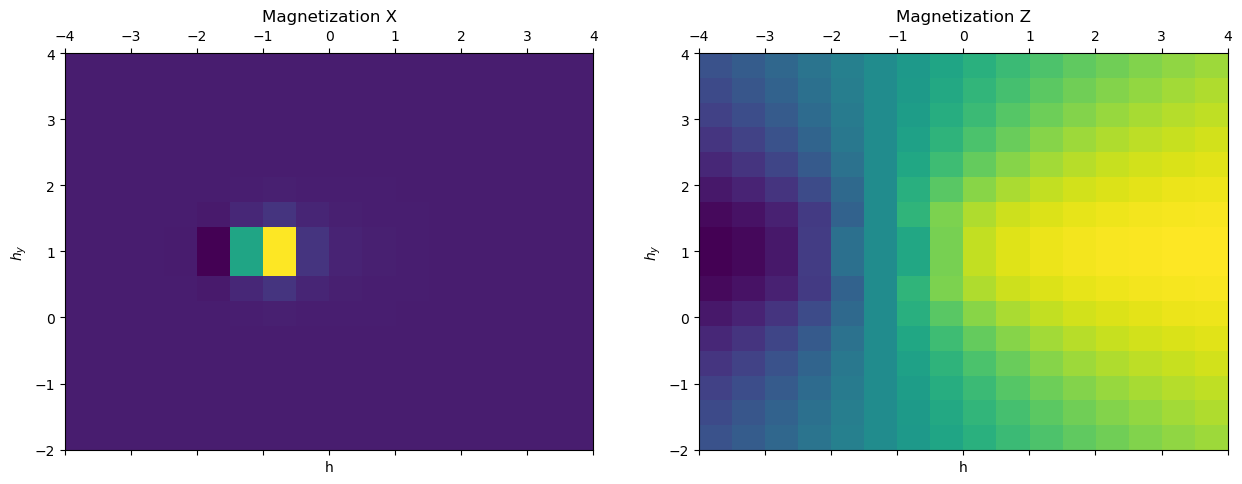

In [49]:
params = [[hy,h] for hy in hys for h in hs]
params_extent = np.concatenate([np.min(params, axis=0), np.max(params, axis=0)])
params_extent = tuple(params_extent[[0, 2, 1, 3]])

fig, ax = plt.subplots(1,2, figsize=(15,10))
ax[0].matshow(mag_x, origin='lower', extent=params_extent)
ax[0].set_title("Magnetization X")
ax[0].set_xlabel("h")
ax[0].set_ylabel("$h_y$")
ax[1].matshow(mag_z, origin='lower', extent=params_extent)
ax[1].set_title("Magnetization Z")
ax[1].set_xlabel("h")
ax[1].set_ylabel("$h_y$");

In [50]:
path_rdms = "/Users/fradm98/Desktop/fidelity-phase-tran"
np.save(f"{path_rdms}/results/data/5_sites-rdms_Cluster-XY_L_{L}_hx_-2.0-4.0_hy_-4.0-4.0_delta_16_degeneracy_method_0_guess_path_False.npy", rdms)

## $h=0$ case

In [51]:
# we can insert additional interaction terms in XX or YY or both
L=12
hxs = np.linspace(-4,4,16)
hys = np.linspace(-4,4,16)

mag_x = []
mag_z = []
rdms = []
for hy in hys:
    mag_x_h = []
    mag_z_h = []
    rdms_h = []
    for hx in hxs:
        print(f"hy: {hy}, hx: {hx}")
        H = sparse_cluster_xy_hamiltonian(J=1, h_t=0, h_x=hx, h_y=hy, L=L)
        e, v = diagonalization(H, sparse=True)
        psi = v[:,0]
        mag = (psi.conjugate() @ (sparse_pauli_x(n=L//2, L=L)) @ psi).real
        mag_x_h.append(mag)
        mag = (psi.conjugate() @ (sparse_pauli_z(n=L//2, L=L)) @ psi).real
        mag_z_h.append(mag)

        chain = MPS(L=L, d=2, model="Cluster", chi=32)
        chain.vector_to_mps(vec=psi, chi=32)
        rdm = chain.reduced_density_matrix([L//2-2,L//2-1,L//2,L//2+1,L//2+2])
        rdms_h.append(rdm)

    mag_x.append(mag_x_h)
    mag_z.append(mag_z_h)
    rdms.append(rdms_h)

hy: -4.0, hx: -4.0
hy: -4.0, hx: -3.466666666666667
hy: -4.0, hx: -2.9333333333333336
hy: -4.0, hx: -2.4
hy: -4.0, hx: -1.8666666666666667
hy: -4.0, hx: -1.3333333333333335
hy: -4.0, hx: -0.7999999999999998
hy: -4.0, hx: -0.2666666666666666
hy: -4.0, hx: 0.2666666666666666
hy: -4.0, hx: 0.7999999999999998
hy: -4.0, hx: 1.333333333333333
hy: -4.0, hx: 1.8666666666666663
hy: -4.0, hx: 2.4000000000000004
hy: -4.0, hx: 2.9333333333333336
hy: -4.0, hx: 3.466666666666667
hy: -4.0, hx: 4.0
hy: -3.466666666666667, hx: -4.0
hy: -3.466666666666667, hx: -3.466666666666667
hy: -3.466666666666667, hx: -2.9333333333333336
hy: -3.466666666666667, hx: -2.4
hy: -3.466666666666667, hx: -1.8666666666666667
hy: -3.466666666666667, hx: -1.3333333333333335
hy: -3.466666666666667, hx: -0.7999999999999998
hy: -3.466666666666667, hx: -0.2666666666666666
hy: -3.466666666666667, hx: 0.2666666666666666
hy: -3.466666666666667, hx: 0.7999999999999998
hy: -3.466666666666667, hx: 1.333333333333333
hy: -3.466666666666

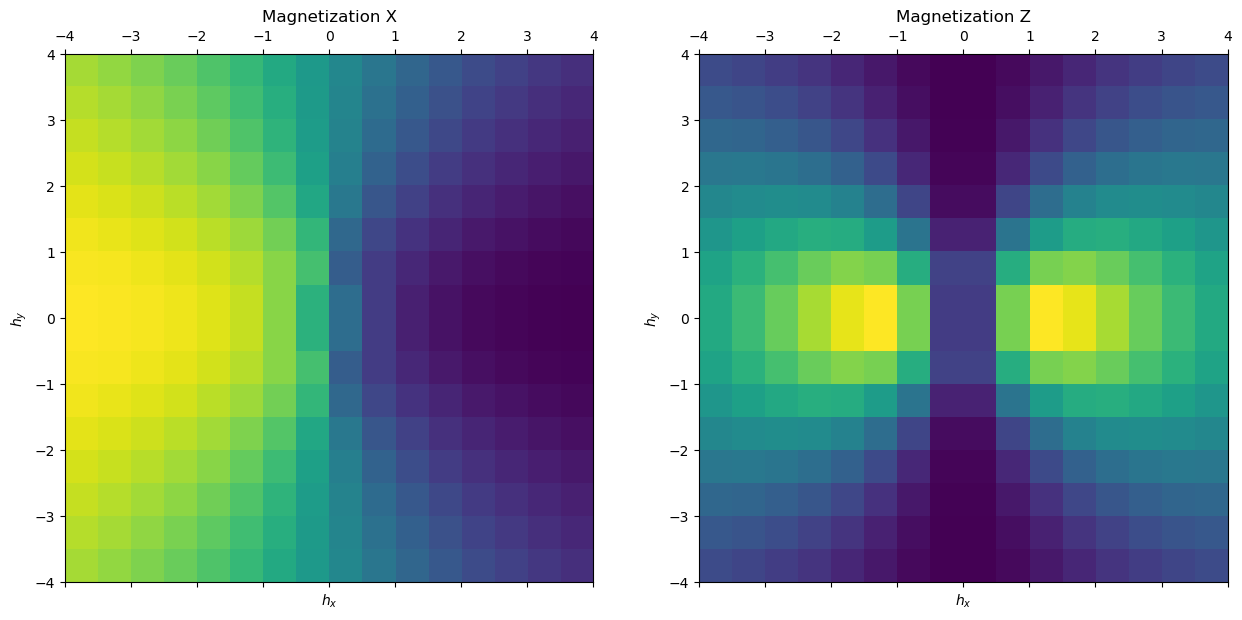

In [52]:
params = [[hy,hx] for hy in hys for hx in hxs]
params_extent = np.concatenate([np.min(params, axis=0), np.max(params, axis=0)])
params_extent = tuple(params_extent[[0, 2, 1, 3]])

fig, ax = plt.subplots(1,2, figsize=(15,10))
ax[0].matshow(mag_x, origin='lower', extent=params_extent)
ax[0].set_title("Magnetization X")
ax[0].set_xlabel("$h_x$")
ax[0].set_ylabel("$h_y$")
ax[1].matshow(mag_z, origin='lower', extent=params_extent)
ax[1].set_title("Magnetization Z")
ax[1].set_xlabel("$h_x$")
ax[1].set_ylabel("$h_y$");

In [53]:
path_rdms = "/Users/fradm98/Desktop/fidelity-phase-tran"
np.save(f"{path_rdms}/results/data/5_sites-rdms_Cluster-XY_L_{L}_hx_-4.0-4.0_hy_-4.0-4.0_delta_16_degeneracy_method_0_guess_path_False.npy", rdms)